In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visual style for all plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# UPDATE THIS PATH TO YOUR ACTUAL FILE LOCATION
file_path = r'C:\Academics\Sem 4\Machine learning\ChurnPred\Dataset\Telco Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv'

def load_and_clean_data(filepath):
    print("--- Loading Data ---")
    df = pd.read_csv(filepath)
    
    # TRAP 1: 'TotalCharges' is read as object because of empty spaces " "
    # We enforce numeric conversion. Errors become NaN.
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Handle NaN (TotalCharges is NaN where Tenure is 0)
    df['TotalCharges'].fillna(0, inplace=True)
    
    # Drop ID (Useless for analysis)
    if 'customerID' in df.columns:
        df.drop(columns=['customerID'], inplace=True)
        
    # Convert 'SeniorCitizen' to string for better plotting labels
    df['SeniorCitizen'] = df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'})
    
    print("Data Cleaned Successfully.")
    print(f"Dataset Shape: {df.shape}")
    return df

# Execute loading
df = load_and_clean_data(file_path)

# Show first 5 rows
df.head()

--- Loading Data ---
Data Cleaned Successfully.
Dataset Shape: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


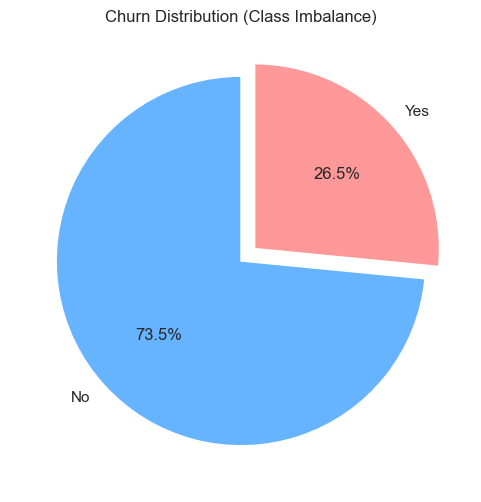

In [3]:
plt.figure(figsize=(6, 6))

# Pie Chart for Class Imbalance
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0, 0.1))

plt.title('Churn Distribution (Class Imbalance)')
plt.show()

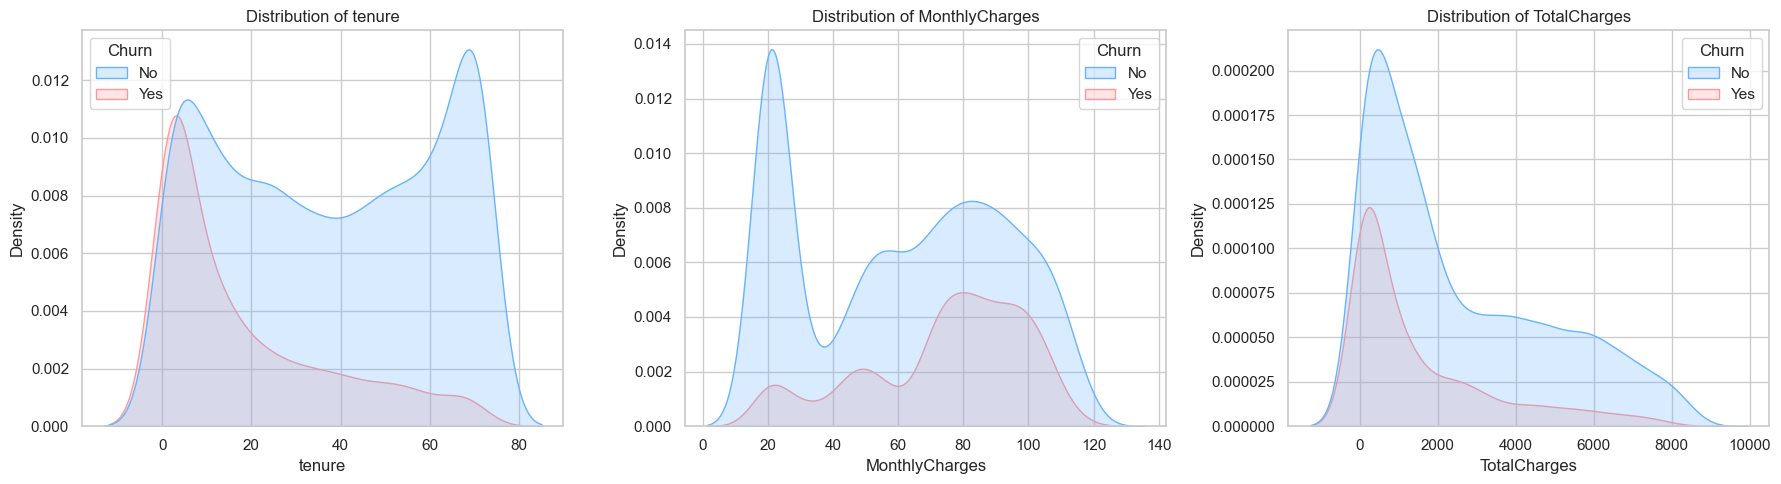

In [4]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_cols):
    # KDE Plot - Shows the "Shape" of the data
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, 
                palette=['#66b3ff', '#ff9999'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

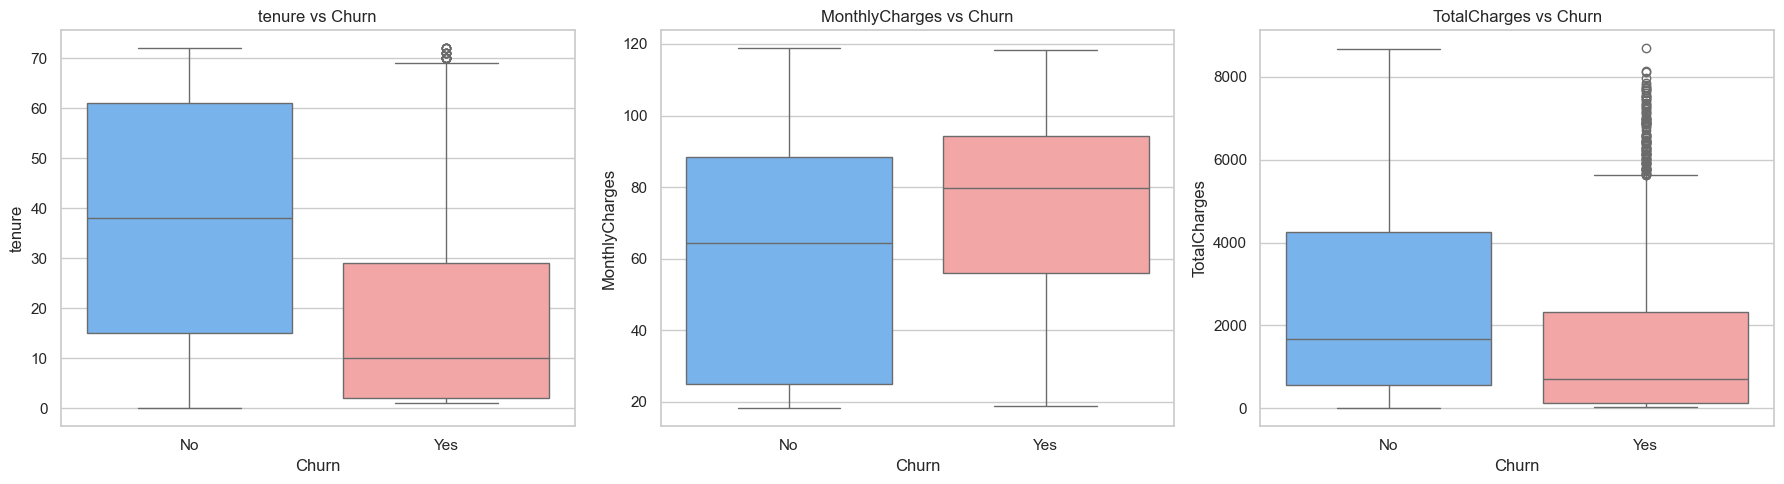

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Churn', y=col, palette=['#66b3ff', '#ff9999'], ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

plt.tight_layout()
plt.show()

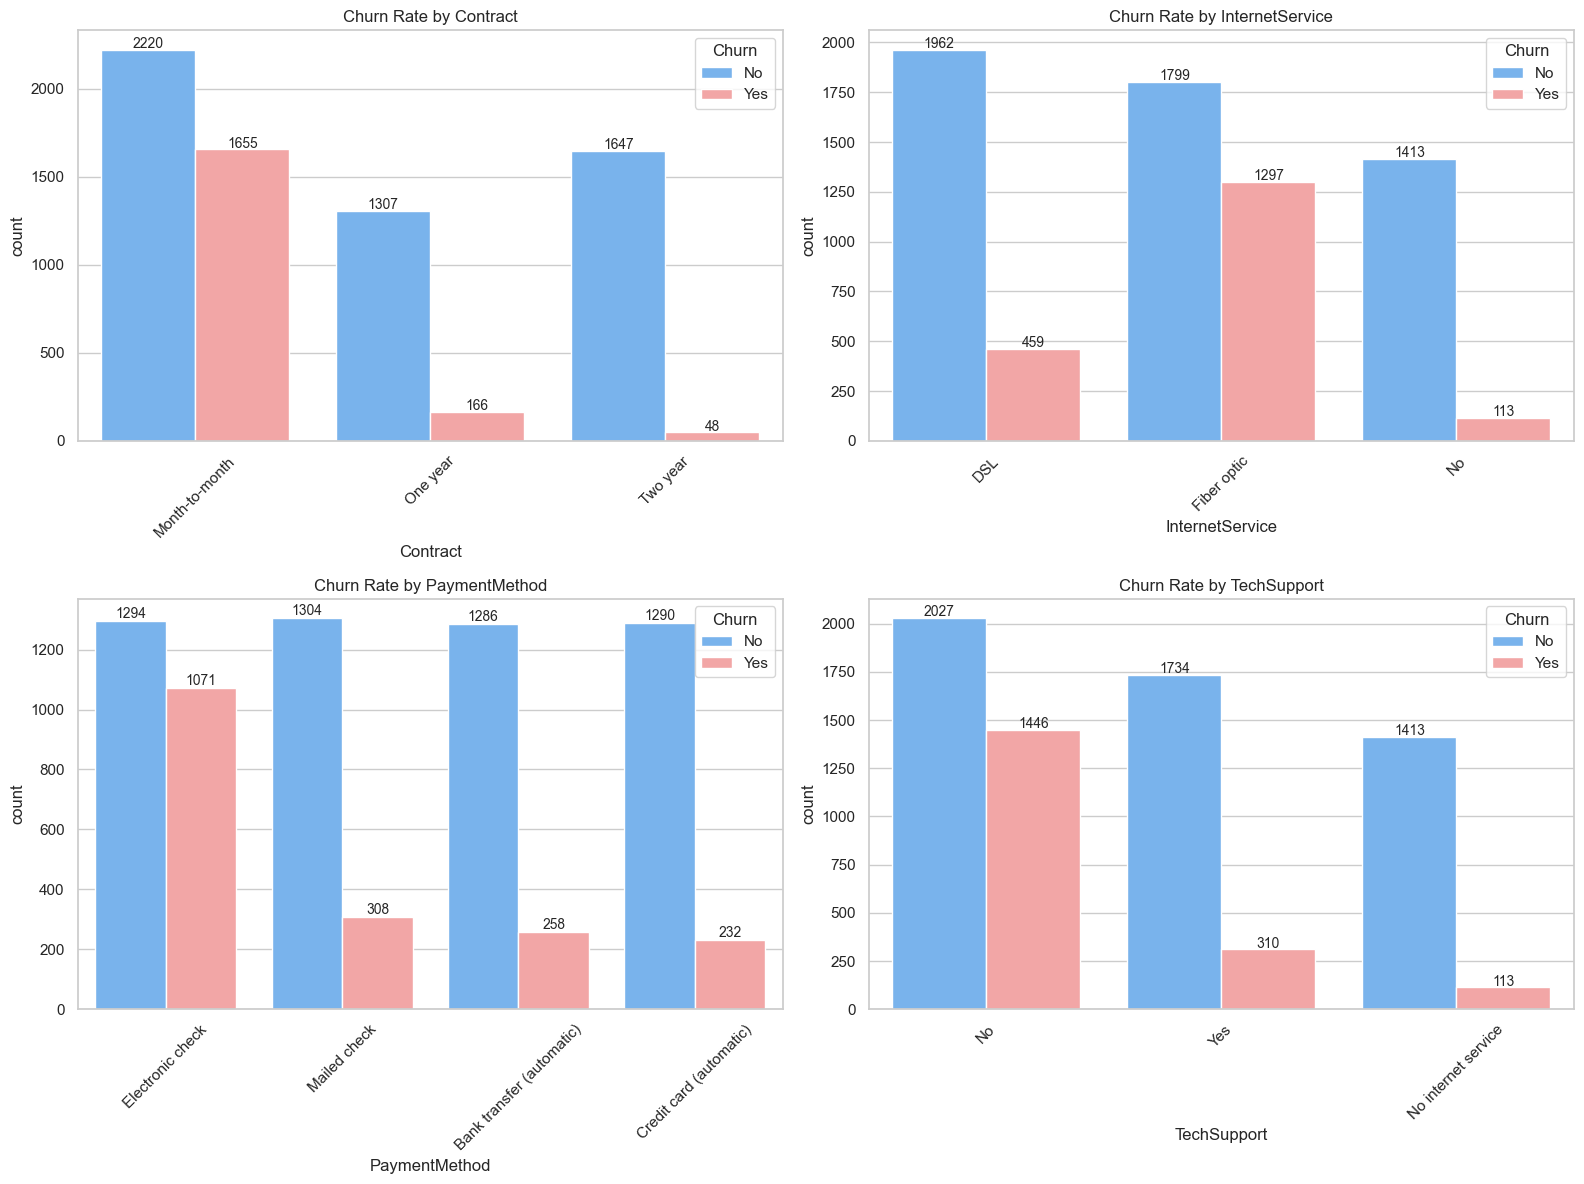

In [6]:
# Key categorical drivers
cat_cols = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # Count Plot with Churn separation
    sns.countplot(data=df, x=col, hue='Churn', palette=['#66b3ff', '#ff9999'], ax=axes[i])
    axes[i].set_title(f'Churn Rate by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add percentages on bars
    total = len(df)
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].text(p.get_x() + p.get_width() / 2., height + 10,
                         '{:1.0f}'.format(height), ha="center", size=10)

plt.tight_layout()
plt.show()

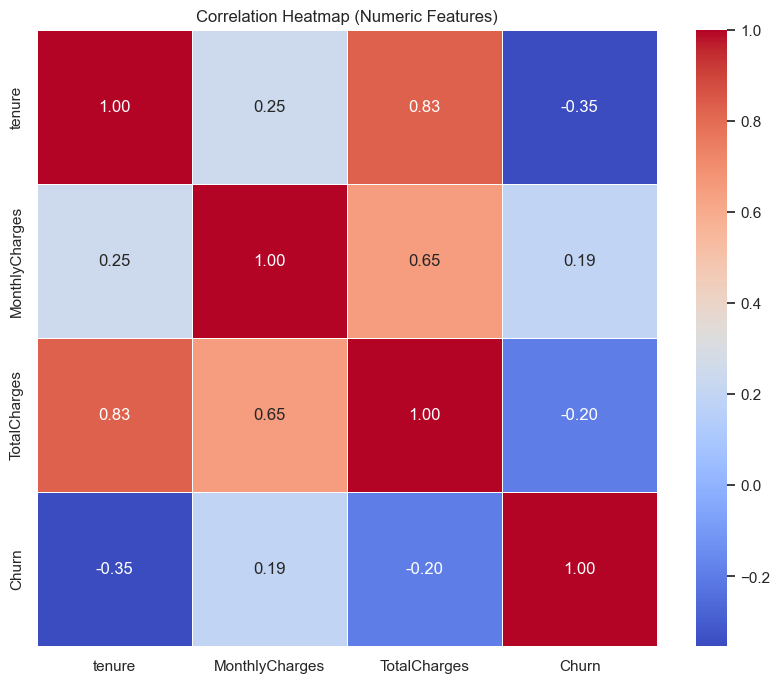

In [7]:
# We need to temporarily encode Churn to 1/0 to see correlation
df_temp = df.copy()
df_temp['Churn'] = df_temp['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numeric columns only
numeric_df = df_temp.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()